<a href="https://colab.research.google.com/github/Sarinda251/CAP_4630/blob/master/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

## Code

### Imports

In [0]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### Get Random Data Function

In [0]:
def get_random_data(w, b, mu, sigma, m):
  # initialize arrays
  data =  np.zeros((m,2))
  labels = np.zeros((m,1))

  for i in range(m):
    # generate data
    c = np.random.randint(2)
    x_1 = np.random.default_rng().uniform(0,1,1)
    n = np.random.normal(mu,sigma,1)
    x_2 = (w * x_1) + b + (((-1)**c) * n)
    
    # store data
    data[i][0] = x_1
    data[i][1] = x_2
    labels[i] = c
  
  return (labels, data)

### Display Random Data Function

In [0]:


def display_random_data(labels, data):

  blue_x = []
  blue_y = []
  red_x = []
  red_y = []
  
  m = len(labels)
  for i in range(m):
    if(labels[i] == 0):
      blue_x.append(data[i][0])
      blue_y.append(data[i][1])
    else:
      red_x.append(data[i][0])
      red_y.append(data[i][1])

  plt.scatter(blue_x, blue_y, color='blue', label = 'class 0')
  plt.scatter(red_x, red_y, color='red', label = 'class 1')
  plt.xlabel("$x_1$", fontsize=16)
  plt.ylabel("$x_2$", rotation=0, fontsize=16)
  plt.legend()


### Create training and test sets

(2000, 2)
(2000, 1)
[[ 0.07640229  0.09713592]
 [ 0.78743981  7.01484729]
 [ 0.49772916  3.37888539]
 ...
 [ 0.4094767   3.07421282]
 [ 0.2581734   2.23069858]
 [ 0.36626031 -4.73357479]]


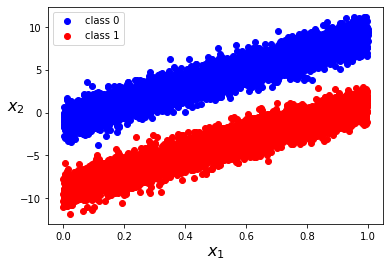

In [22]:
slope = 10
intercept = -5
m = 10000

(testinglabels, testingdata) = get_random_data(slope,intercept,4,1,m)
display_random_data(testinglabels, testingdata)

train_xs = testingdata[:8000]
train_ys = testinglabels[:8000]

test_xs = testingdata[8000:]
test_ys = testinglabels[8000:]



print(test_xs.shape)
print(test_ys.shape)
print(train_xs)

## Testing

The below test data are around the line $y = 5x + 5$ with 100 data points

### no blue/red overlap (mean = 3, stdev = 1)

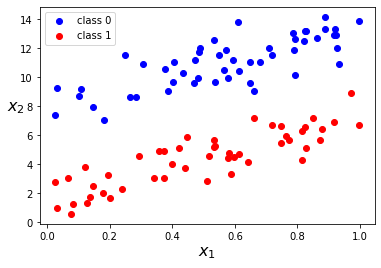

In [23]:
(labels, data) = get_random_data(5,5,3,1,100)
display_random_data(labels, data)

### minimal blue/red overlap (mean = 3, stdev = 2)

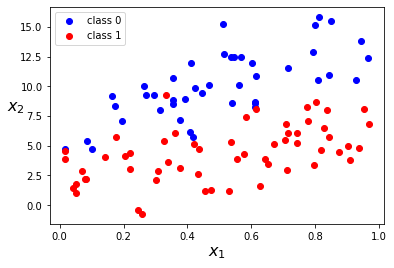

In [24]:
(labels, data) = get_random_data(5,5,3,2,100)
display_random_data(labels, data)

### moderate blue/red overlap (mean = 2, stdev = 3)

*   List item
*   List item



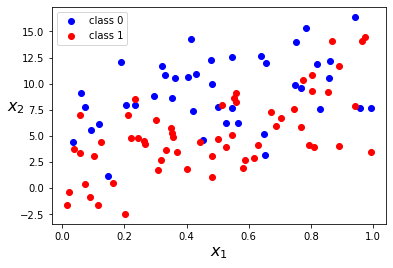

In [25]:
(labels, data) = get_random_data(5,5,2,3,100)
display_random_data(labels, data)

### complete blue/red overlap (mean = 1, stdev = 3)

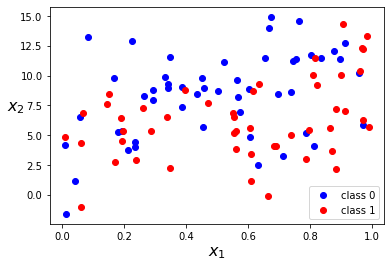

In [26]:
(labels, data) = get_random_data(5,5,1,3,100)
display_random_data(labels, data)

# Problem 2

## Imports

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import math

## Code

### Model

In [0]:
model = tf.keras.models.Sequential()

#model.add(tf.keras.layers.Dense(2, activation='linear', input_dim=2))
#model.add(tf.keras.layers.Dense(2, activation='relu'))
layer2 = tf.keras.layers.Dense(1, activation='sigmoid', input_dim=2)
model.add(layer2)

# compile model
# model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(train_xs, train_ys, epochs=25, batch_size=50)

Epoch 1/25
160/160 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9979
Epoch 2/25
160/160 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9980
Epoch 3/25
160/160 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.9980
Epoch 4/25
160/160 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 0.9984
Epoch 5/25
160/160 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9983
Epoch 6/25
160/160 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.9985
Epoch 7/25
160/160 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 0.9987
Epoch 8/25
160/160 [==============================] - 0s 1ms/step - loss: 0.0247 - accuracy: 0.9986
Epoch 9/25
160/160 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.9989
Epoch 10/25
160/160 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 0.9987

Testing the model against the train and the test set

In [30]:
model.evaluate(train_xs, train_ys)
model.evaluate(test_xs, test_ys)

63/63 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9990


[0.030023906379938126, 0.9990000128746033]

### Original Data with separating line

The trained model realizes a function $f:R^2\to[0,1]$ that gives the probability that the given data point is above the line (blue). 

The function is of the form $f(x_1,x_2) = 1 / (1 + e^{-(w_1  x_1 + w_2  x_2 + b)})$

To calculate the separating line, we let $f(x_1,x_2) = .5$, since any point on this line has an equal chance of being blue or red

Solving for $x_2$ yields:
<h2><center>

$.5 = 1 / (1 + e^{-(w_1  x_1 + w_2  x_2 + b)})$

$.5 (1 + e^{-(w_1  x_1 + w_2 x_2 + b)})= 1$

$1 + e^{-(w_1  x_1 + w_2 x_2 + b)}= 2$

$e^{-(w_1  x_1 + w_2 x_2 + b)}= 1$

$-(w_1  x_1 + w_2 x_2 + b) = 0$

$w_2 x_2 = -w_1 x_1 - b$

$x_2 = -(w_1 x_1 + b) / w_2$

</h2></center>

$x_2 = -(w_1 x_1 + b) / w_2$ is the equation for the trained separating line

**Note:** if $w_2 = 0$, the separating line is instead the vertical line $x_1 = -b / w_1$


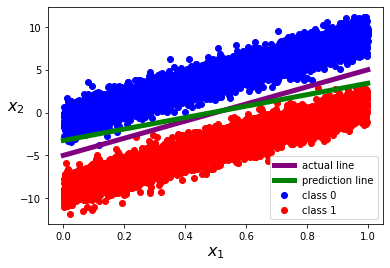

In [41]:
weights, bias = layer2.get_weights()
weights.shape
bias.shape

# print(weights)
# print(bias)

w1 = weights[0][0]
w2 = weights[1][0]
b = bias[0]

# print(w1, w2, b)

x = np.linspace(0,1,1000)
display_random_data(testinglabels, testingdata)
plt.plot(x, (slope * x) + intercept, color='purple', linewidth=5, label = 'actual line')
if(np.abs(w2) < 1e-6):
  plt.axvline(x=(-b/w1), ymin=min_y, ymax=max_y, color='green', linewidth=5, label = 'prediction line')
else:
  plt.plot(x, -((w1 * x) + b) / w2, color='green', linewidth=5, label = 'prediction line')
plt.legend()
plt.show()

In the above model, the original data is presented along side the generating line (black) and the trained separating line (green)

### Heatmap

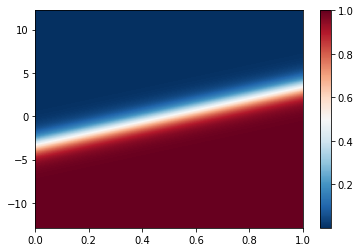

In [45]:
# Function definition
def f1(x, y):
    return (1 / (1 + np.exp(-(b + (w1 * x) + (w2 * y)))))
    # return np.exp(x + y)


# These are to keep track of the scatter plot bounds for plotting
max_y = float("-inf")
min_y = float("inf")

for i in range(testinglabels.size):
  if(testingdata[i][1] < min_y):
    min_y = testingdata[i][1]
  if(testingdata[i][1] > max_y):
    max_y = testingdata[i][1]

X1, X2 = np.meshgrid(np.linspace(0,1,1000), np.linspace(min_y - 1,max_y + 1,1000))
Y = f1(X1, X2)

# Plot density
plt.pcolormesh(X1, X2, Y, cmap='RdBu_r')
plt.colorbar();

# Problem 3

## Code

### Stochastic Gradient Descent

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [0]:
# number of epochs
epochs = 25
# learning rate
lr = 0.01
# fix initial random weight for gradient descent
np.random.seed(42)
initial_weight = np.random.randn(3, 1) 

X_b = np.column_stack([np.ones((train_xs.shape[0], 1)), train_xs])

In [0]:
weight = initial_weight
weight_path_sgd = []

weight_path_sgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(train_xs.shape[0])
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = train_ys[shuffled_indices]
    
    for i in range(test_xs.shape[0]):           
        xi = X_b_shuffled[i:i+1]
        yi = y_shuffled[i:i+1]
        loss = sigmoid(xi.dot(weight)) - yi
        gradient = xi.T.dot(loss)
        weight = weight - lr * gradient
        weight_path_sgd.append(weight)      


#### Accuracy and loss on the test set

In [36]:
weight_path_sgd[-1]

b2 = weight_path_sgd[-1][0]
w12 = weight_path_sgd[-1][1]
w22 = weight_path_sgd[-1][2]

# Function definition
def f1(x, y):
    return (1 / (1 + np.exp(-(b2 + (w12 * x) + (w22 * y)))))
    # return np.exp(x + y)

# calculate accuracy for test set
correct = 0
for i in range(len(test_ys)):
  if(np.round(f1(test_xs[i][0], test_xs[i][1])) == test_ys[i]):
    correct += 1
# calculate loss
loss_test = np.column_stack([np.ones((test_xs.shape[0], 1)), test_xs])
loss = (-test_ys * np.log(sigmoid(loss_test.dot(weight)))) - ((1 - test_ys) * np.log(1 - sigmoid(loss_test.dot(weight))))

# calculate full set accuracy
print(str(correct) + "/" + str(len(test_ys)) + " correct from the test set")
print("binary cross entrophy loss for test set:" + str(np.average(loss)))
correct2 = 0
for i in range(m):
  if(np.round(f1(testingdata[i][0], testingdata[i][1])) == testinglabels[i]):
    correct2 += 1

print(str(correct2) + "/" + str(m) + " correct from the full dataset")

1998/2000 correct from the test set
binary cross entrophy loss for test set:0.03223391913479584
9984/10000 correct from the full dataset


### Test Set Visualization

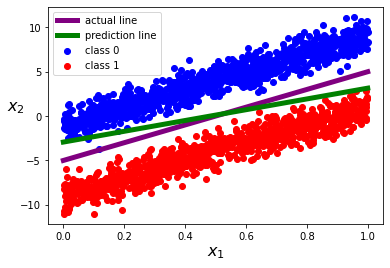

In [37]:


# print(w1, w2, b)

x = np.linspace(0,1,1000)
display_random_data(test_ys, test_xs)
plt.plot(x, (slope * x) + intercept, color='purple', linewidth=5, label = 'actual line')
if(np.abs(w2) < 1e-6):
  plt.axvline(x=(-b2/w12), ymin=min_y, ymax=max_y, color='green', linewidth=5, label = 'prediction line')
else:
  plt.plot(x, -((w12 * x) + b2) / w22, color='green', linewidth=5, label = 'prediction line')
plt.legend()
plt.show()

### Complete Data Set

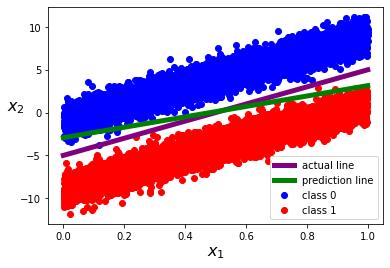

In [38]:


# print(w1, w2, b)

x = np.linspace(0,1,1000)
display_random_data(testinglabels, testingdata)
plt.plot(x, (slope * x) + intercept, color='purple', linewidth=5, label = 'actual line')
plt.plot(x, -((w12 * x) + b2) / w22, color='green', linewidth=5, label = 'prediction line')
plt.legend()
plt.show()

### Heatmap

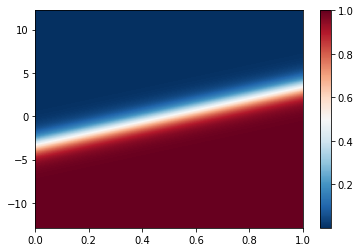

In [46]:
# These are to keep track of the scatter plot bounds for plotting
max_y = float("-inf")
min_y = float("inf")

for i in range(testinglabels.size):
  if(testingdata[i][1] < min_y):
    min_y = testingdata[i][1]
  if(testingdata[i][1] > max_y):
    max_y = testingdata[i][1]

X1, X2 = np.meshgrid(np.linspace(0,1,1000), np.linspace(min_y - 1,max_y + 1,1000))
Y = f1(X1, X2)

# Plot density
plt.pcolormesh(X1, X2, Y, cmap='RdBu_r')
plt.colorbar();